# Team Project 1 - MATH 420
## James Boggs and Camilo Velez R
### NYC Covid Data

In [2]:
# activate env and instantiate pkgs
using Pkg
Pkg.activate("../p1")
Pkg.instantiate()

  Activating project at `~/m420p1/p1`


   Installed LoggingExtras ─ v1.0.0
   Installed BitFlags ────── v0.1.7
   Installed OpenSSL ─────── v1.3.3
   Installed HTTP ────────── v1.7.4


Precompiling project...


  ✓ SimpleBufferStream


  ✓ BitFlags
  ✓ LoggingExtras


  ✓ OpenSSL


  ✓ HTTP


  ✓ GR


  ✓ Plots
  7 dependencies successfully precompiled in 30 seconds. 249 already precompiled.


In [49]:
using CSV, DataFrames, Dates, LaTeXStrings # import necessary pkgs

In [4]:
df = CSV.read("../resources/data.csv", DataFrame) # entire df

v_infected = values(df[1, 13:end]) # vector of infected numbers
infected_dates = names(df[1, 13:end]) # vector of infected_dates
@assert length(v_infected) == length(infected_dates)

# Exercise 1

## 1)

In [5]:
findfirst([x>=5 for x in v_infected])

46

$T_{0} = 46$

## 2)

In [6]:
vt = values(df[1, 13+46:13+46+120-1]);
@show length(vt)

length(vt) = 120


120

In [7]:
I(t:: Int) = vt[t+1] # define I(t)

I (generic function with 1 method)

In [8]:
Nmax = df.Population[1];
Nmin = vt[end] + 1;
@show Nmax, Nmin

(Nmax, Nmin) = (1628706, 27717)


(1628706, 27717)

### a)

#### ii)

In [9]:
f1(t::Int, n::Int) = t*log((I(t)*(n - I(0))) / (I(0)*(n - I(t))))

f1 (generic function with 1 method)

In [10]:
tmax = 119;
β̂_min = 6/(tmax*(tmax+1)*(2tmax+1))*(sum(x -> f1(x, Nmin), 1:tmax))

0.13807405982926169

In [11]:
β̂_max = 6/(tmax*(tmax+1)*(2tmax+1))*(sum(x -> f1(x, Nmax), 1:tmax))

0.10515569276026039

Values for estimated $\beta$:
* For $N_{max}: \hat{\beta} \approx 0.105$
* For $N_{min}: \hat{\beta} \approx 0.138$

In [12]:
beta = Dict(Nmin=> β̂_min, Nmax => β̂_max)

Dict{Int64, Float64} with 2 entries:
  27717   => 0.138074
  1628706 => 0.105156

In [13]:
j_helper(t, n) = (beta[n]*t - log(I(t)/(n - I(t))) + log(I(0)/(n - I(0))))^2
j_helper(t, n, b) = (b*t - log(I(t)/(n - I(t))) + log(I(0)/(n - I(0))))^2
J(n::Int) = sum(x -> j_helper(x, n), 0:tmax)
J(n::Int, beta::Real) = sum(x -> j_helper(x, n, beta), 0:tmax)

J (generic function with 2 methods)

In [15]:
J(Nmin)

874.1086923318926

In [16]:
J(Nmax)

1078.5175521773804

$J(\beta, N)$:
* For $N_{min}: J(\beta, N) \approx 874.109$:
* For $N_{max}: J(\beta, N) \approx 1078.517$:

#### ii)

In [17]:
using Plots

In [106]:
function predict1(n::Int, t::Int)
    (n*I(0))/(I(0) + (n - I(0))*exp(-beta[n]*t))
end
function predict1(n::Int, t::Int, beta::Real)
    (n*I(0))/(I(0) + (n - I(0))*exp(-beta*t))
end

predict1 (generic function with 2 methods)

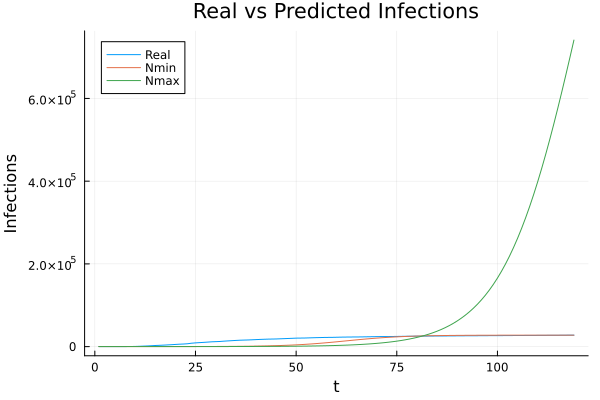

In [128]:
plot(1:tmax, [I.(1:tmax), [predict1(Nmin, x) for x in 1:tmax], [predict1(Nmax, x) for x in 1:tmax]],
label = ["Real" "Nmin" "Nmax"], title="Real vs Predicted Infections", xlabel="t", ylabel="Infections")

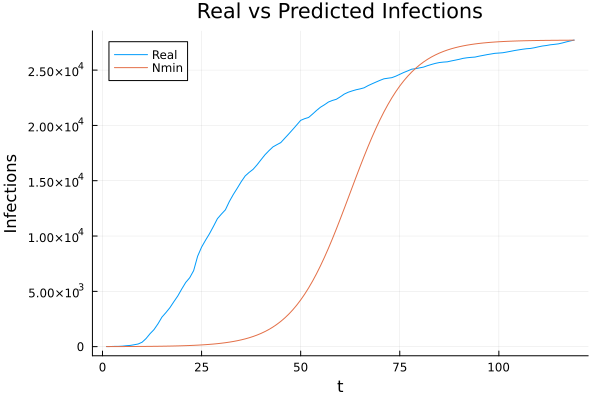

In [127]:

plot(1:tmax, [I.(1:tmax), [predict1(Nmin, x) for x in 1:tmax]], 
label = ["Real" "Nmin"], title="Real vs Predicted Infections", xlabel="t", ylabel="Infections")

### b)

#### i)

In [21]:
function J2(n::Int)::Real
    a = 6/(tmax*(tmax+1)*(2*tmax+1))
    s1(t::Int) = abs(log((I(t)*(n - I(0))) / (I(0)*(n - I(t)))))^2
    s2(t::Int) =   t*log((I(t)*(n - I(0))) / (I(0)*(n - I(t))))
    r = sum(s1, 1:tmax) - a*(sum(s2, 1:tmax))^2
    return r
end
    

J2 (generic function with 1 method)

In [22]:
using OrderedCollections
J_dict = OrderedDict()
for x in 0:20
    n = Nmin + x;
    a = J2(n);
    x != 0 && (a > J_dict[n-1]) && break
    J_dict[n] = a;
end


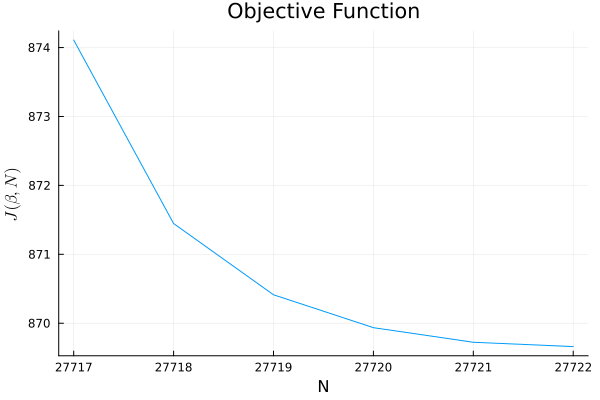

In [103]:
plot(collect(keys(J_dict)), collect(values(J_dict)), title="Objective Function", labels=false,
xlabel="N", ylabel=L"J(\beta, N)")

Chosen $N = 27722$


In [24]:
function beta_n(n)
    a = (6/(tmax*(tmax + 1)*(2*tmax + 1)))
    s1(t::Int) = t*log((I(t)*(n - I(0))) / (I(0)*(n - I(t))))
    r = a*sum(s1, 1:tmax)
    return r
end

beta_n (generic function with 1 method)

#### ii)

In [134]:
for n in collect(keys(J_dict))
    println("N = $(n), \u03b2 = $(beta_n(n)), J(N, \u03b2) = $(J(n, beta_n(n)))")
end

N = 27717, β = 0.13807405982926169, J(N, β) = 874.1086923318926
N = 27718, β = 0.13791749425672672, J(N, β) = 871.4460941052558
N = 27719, β = 0.13782116238725073, J(N, β) = 870.4123166790648
N = 27720, β = 0.1377495196610878, J(N, β) = 869.9350949181711
N = 27721, β = 0.13769142625603764, J(N, β) = 869.7233379562639
N = 27722, β = 0.13764191977787016, J(N, β) = 869.6605870788865


#### iii)

In [26]:
chosen_n = collect(keys(J_dict))[end]

27722

In [27]:
predicted2 = predict1.(chosen_n, 0:tmax, beta_n(chosen_n));

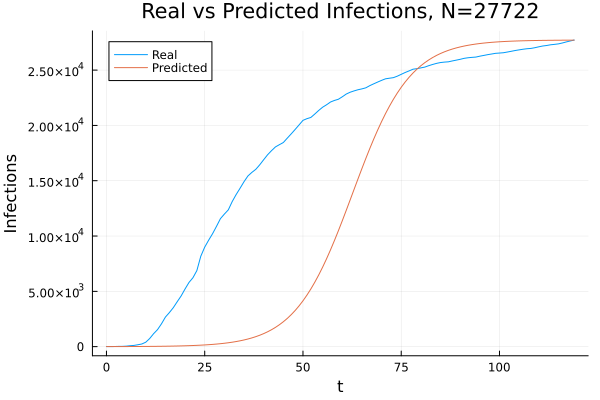

In [135]:
plot(0:tmax, [I.(0:tmax), predicted2], labels=["Real" "Predicted"],
title="Real vs Predicted Infections, N=$(chosen_n)", xlabel="t", ylabel="Infections")

#### iv)

In [84]:
x = Nmin:100:Nmax
y = J2.(Nmin:100:Nmax);

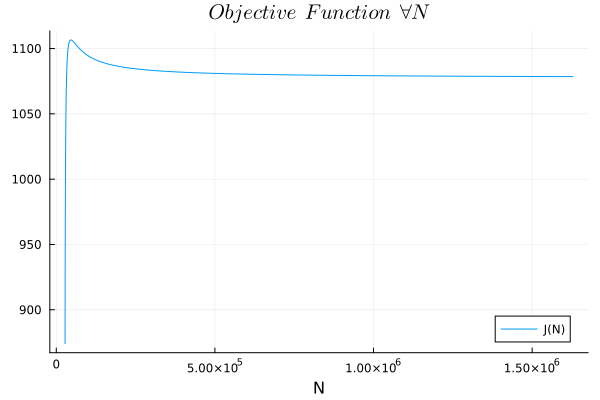

In [97]:
plot(x, y, labels="J(N)", title=L"Objective \enspace Function \enspace \forall N", xlabel="N")

Based on plot we can see that the min $N$ will have to be $\approx \lt 100,000$, running the search on every possible $N$ took too long so we will narrow down the search

In [31]:
min_j = J2(Nmin);
min_n = Nmin;
for x in Nmin:(Nmin+100000)
    curr = J2(x);
    if curr < min_j
        min_j = curr;
        min_n = x;
    end
end

In [32]:
min_j = J2(Nmin);
min_n = Nmin;
for x in Nmin:(Nmin+100000)
    curr = J2(x);
    if curr < min_j
        min_j = curr;
        min_n = x;
    end
end

println("The minimum on this interval is at N = $(min_n)")

The minimum on this interval is at N = 27722


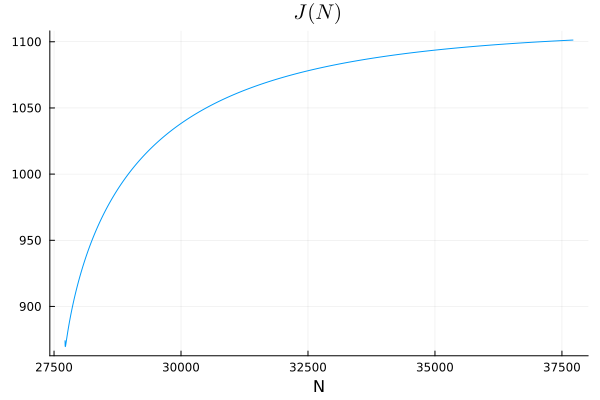

In [140]:
plot(Nmin:Nmin+10^4, J2, labels=false, title=L"J(N)", xlabel="N")

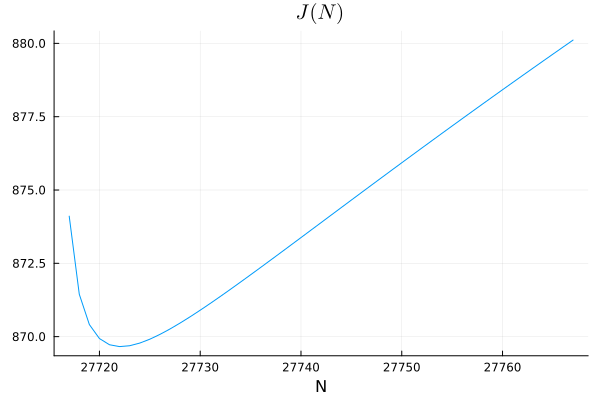

In [142]:
plot(Nmin:Nmin+50, J2, title=L"J(N)", xlabel="N", labels=false)

This $N=27722$ is the same $N$ as we got before in part (b.ii)

### c)

In [33]:
function Ideal(n, b)
    s1(t::Int) = (I(t) - ((n*I(0)) / (I(0) + (n - I(0))*exp(-b*t))))^2
    r = sum(s1, 0:tmax)
    return r
end

Ideal (generic function with 1 method)

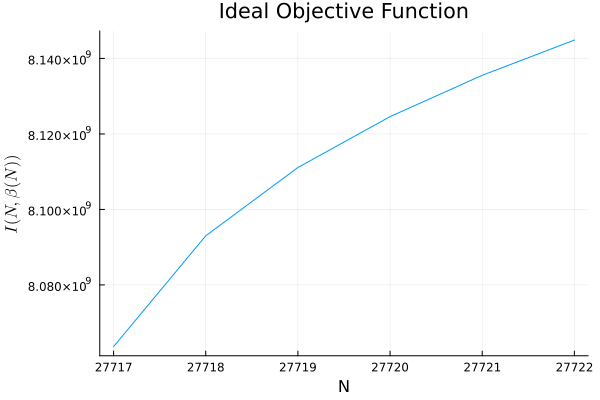

In [81]:
x = collect(keys(J_dict))
plot(x, Ideal.(x, beta_n.(x)), labels = false, title="Ideal Objective Function", xlabel="N", ylabel=L"I(N, \beta(N))")

This does not match the findings in (b.ii), now the minimum is at $N = 27717 = N_{min}$ unlike before in part (b.ii) where it was $N = 27722$

# Exercise 2

In [35]:
new_vt = values(df[1, 13:end]); # include values before t0 >=5

## 1)

In [36]:
v(t::Int) = new_vt[t]
# rate of active infection 
function I2(t::Int)::Real
    t0 = 46
    τ = 7
    return v(t+t0+τ) - v(t+t0-τ)
end

I2 (generic function with 1 method)

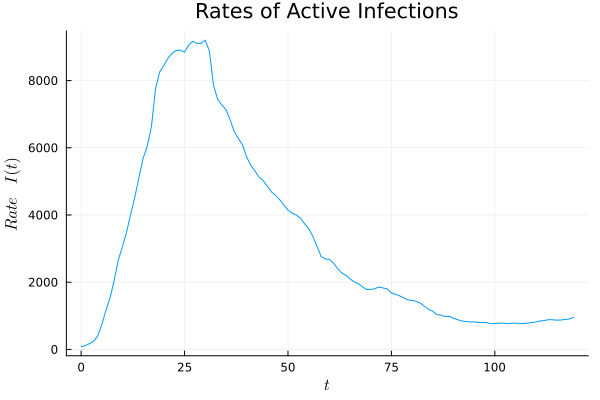

In [79]:
plot(0:tmax, I2.(0:tmax), labels = false, title="Rates of Active Infections", xlabel=L"t", ylabel=L"Rate \quad I(t)")

## 2)

In [38]:
# Euler scheme
function euler(alpha, beta, N)
  h = 0.01

  I_sim = zeros(tmax+1)

  s = N
  i = I2(0)
  r = 0

  t = 0
  while t < tmax + 0.0001
    if abs(round(Int, t) - t) < 0.0001
      I_sim[round(Int, t)+1] = i 
    end

    ds = -beta*s*(i/N)
    di = beta*s*(i/N) - alpha*i
    dr = alpha*i
  
    s += h*ds
    i += h*di
    r += h*dr
    t += h
  end

  return I_sim
end

euler (generic function with 1 method)

## 3)

In [39]:
# J(alpha, beta, N)
function J3(I_sim)
  s1(t) = (I2(t) - I_sim[t+1])^2
  return sum(s1, 0:tmax)
end

J3 (generic function with 1 method)

In [40]:
# run the Euler scheme for each element of omega and save the resulting J(alpha, beta, N) value
triplets = Dict()

for alpha in [1/10, 1/9, 1/8, 1/7, 1/6, 1/5]
    for beta in (0.8:0.1:1.6)*alpha
        for N in (1:10)*(Nmax/10)
            triplets[(alpha, beta, N)] = J3(euler(alpha, beta, N));
        end
    end
end

## 4)

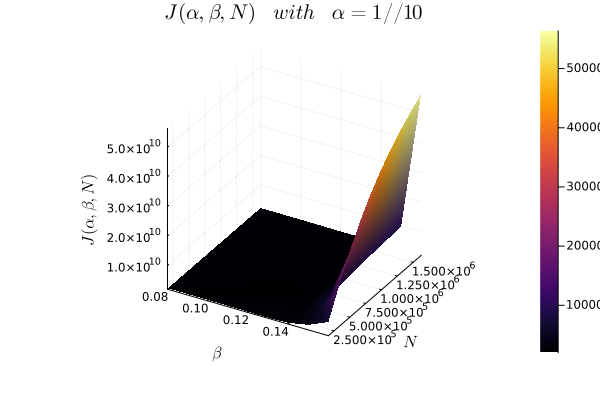

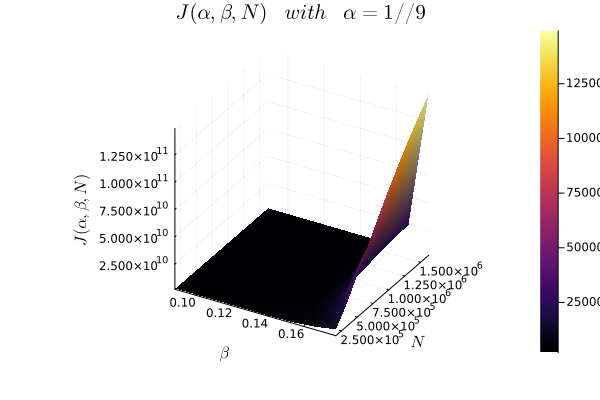

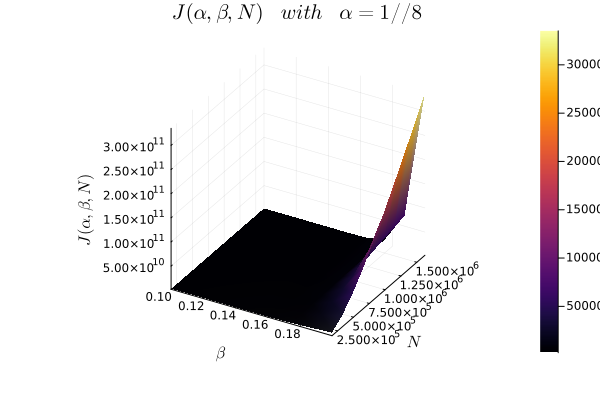

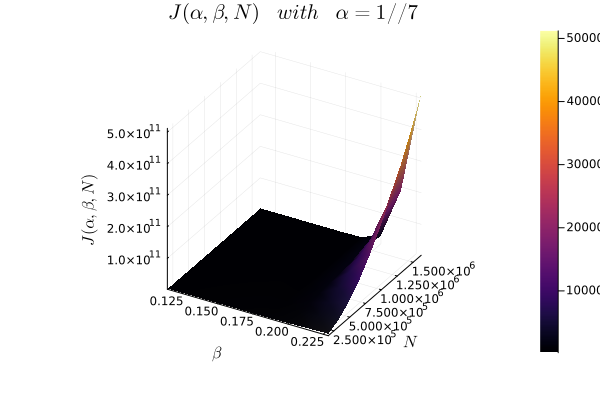

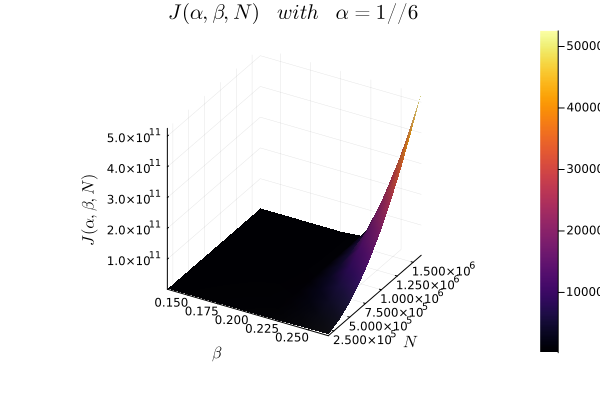

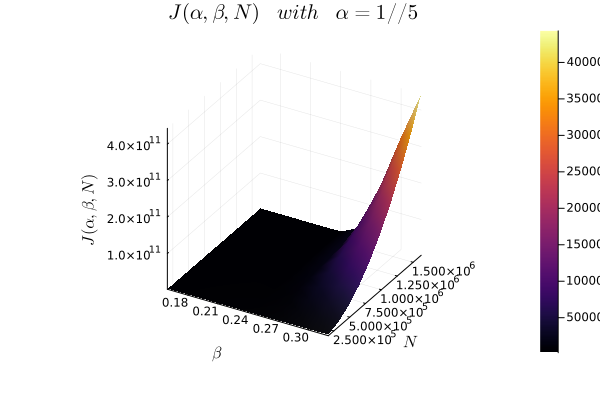

In [73]:
for alpha in [1/10, 1/9, 1/8, 1/7, 1/6, 1/5]
    f_plot(beta, N) = triplets[(alpha, beta, N)];
    display(surface((0.8:0.1:1.6)*alpha, (1:10)*(Nmax/10), f_plot, label = [L"\beta" "N" "J(\u03b1, \u03b2, N)"], title = L"J(\alpha, \beta, N)\quad with \quad \alpha = %$(rationalize(alpha))",
    zlabel=L"J(\alpha, \beta, N)", xlabel=L"\beta", ylabel=L"N"))
end


In [61]:
# compute alpha, beta, N that minimize J(alpha, beta, N)
min_j = triplets[(1/10, 1/10, Nmax)];
min_alpha = 1/10;
min_beta = 1/10;
min_N = Nmax;

for alpha in [1/10, 1/9, 1/8, 1/7, 1/6, 1/5]
    for beta in (0.8:0.1:1.6)*alpha
        for N in (1:10)*(Nmax/10)
            if triplets[(alpha, beta, N)] < min_j
                min_j = triplets[(alpha, beta, N)]
                min_alpha = alpha;
                min_beta = beta;
                min_N = N;
            end
        end
    end
end

println("Minimum value of J(\u03b1, \u03b2, N) occurs at \u03b1 = $(min_alpha), \u03b2 = $(min_beta), N = $(min_N)")

Minimum value of J(α, β, N) occurs at α = 0.2, β = 0.24000000000000002, N = 162870.6
